



# Determining Success and Failure Factors for Startups
***

## Introduction

The purpose of this project is to find out the success and failure factors behind startup companies. To that end, I am going to investigate a dataset provided by [Metric.am](https://metric.am/), containing inforation about 472 startups and their statuses: *'Success'* or *'Failed'*. 

## Methodology

For the sake of this project, we will consider two classes of startups: *failed* and *successful*. As already mentioned above, we are interested in the factors behind the success or failure of the startup. If we tried to map the problem to the data, we would be interested in the importance of each feature or attribute while predicting the status of the given company. Thus, it would be most meaningful and comfortable to solve the problem using a model which would provide us with this information. 

A model that seems suitable under the mentioned constraints is Logstic Regression. It is a classification algorithm, so it can be trained to predict the status of the company. It also associates weights with idividual features, which we can use to determine the importance of the feature, as well as point out if its effect is positive or negative.

So this point onwards, we are going to pursue the following steps:
- [Retrieve the data](#Retrieving-data)
- [Explore the data](#Exploring-data)
- [Prepare the data](#Preparing-data)
    - [Choose the feature set](#Choosing-the-feature-set...)
    - [Handle NaN values](#Handling-NaN-values...)
    - [Handle not NaN empty values](#Handling-not-NaN-empty-values...)
    - [Handle list values](#Handling-list-values...)
    - [Encode categorical variables](#Encoding-categorical-variables...)
    - [Normalize the data](#Normalizing-the-data...)
- [Build the classifier](#Classification)
    - [Split the data into train-test sets](#Train-test-split)
    - [Build the model](#Building-the-model)
    - [Train the model](#Training-the-model)
- [Test the accuracy](#Testing-accuracy)
- [Analyze the calculated weights](#Analyzing-results)
- [Report the conclusions](#Report)

***
## Retrieving data

First of all, let's download the data into a *.csv* file. I will use [wget](https://www.gnu.org/software/wget/) to download raw data from the [GitHub repository](https://github.com/Metricam/Internship_tasks/tree/master/Startup_Success).

In [1168]:
!wget -O data.csv https://raw.githubusercontent.com/Metricam/Internship_tasks/master/Startup_Success/data.csv

--2020-05-21 13:09:46--  https://raw.githubusercontent.com/Metricam/Internship_tasks/master/Startup_Success/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315563 (308K) [text/plain]
Saving to: ‘data.csv’

100%[======================================>] 315,563     --.-K/s   in 0.02s   

2020-05-21 13:09:47 (17.6 MB/s) - ‘data.csv’ saved [315563/315563]



We are also provided a *dictionary* dataset, which explains some of the features provided in the main dataset. Let's get that too.

In [1169]:
!wget -O dictionary.csv https://raw.githubusercontent.com/Metricam/Internship_tasks/master/Startup_Success/dictionary.csv

--2020-05-21 13:09:48--  https://raw.githubusercontent.com/Metricam/Internship_tasks/master/Startup_Success/dictionary.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5183 (5.1K) [text/plain]
Saving to: ‘dictionary.csv’

100%[======================================>] 5,183       --.-K/s   in 0s      

2020-05-21 13:09:48 (32.7 MB/s) - ‘dictionary.csv’ saved [5183/5183]



***
## Exploring data

Now let's understand the data. For that we will need to import some libraries. (Notice, you might need to install the libraries. If that's the case, un-comment the first lines and then run the block.)

In [1170]:
# import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import timeit

### About dataset

What are the attributes?

In [1171]:
data_dict = pd.read_csv('dictionary.csv')
pd.options.display.max_rows = None
pd.options.display.max_columns = None
display(data_dict)

,Variable,Description
0,Company_Name,NaN
1,Dependent-Company Status,Dependent variable indicating if company succe...
2,year of founding,NaN
3,Age of company in years,NaN
4,Internet Activity Score,How much company is acgtive on social media
5,Short Description of company profile,NaN
6,Industry of company,NaN
7,Focus functions of company,NaN
8,Investors,List of investors
9,Employee Count,NaN


Let's take a look at our data. 

In [1172]:
# This code produces and error -- UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 15: invalid start byte
#df = pd.read_csv('data.csv')

The default encoder in read_csv() function is *UTF-8*, however, as we can see from the above error, the data in the *data.csv* file is not UTF-8 encoded. Let's try several other encodings to see if any of them succeeds to decode the data. Here are some: *latin1*, *iso-8859-1*, *cp1252*.

In [1173]:
df = pd.read_csv('data.csv', encoding='latin1')
df.head()
#display(df)

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,Employees count MoM change,Has the team size grown,Est. Founding Date,Last Funding Date,Last Funding Amount,Country of company,Continent of company,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Presence of a top angel or venture fund in previous round of investment,Number of of repeat investors,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Years of education,Specialization of highest education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Renowned in professional circle,Experience in selling and building products,Experience in Fortune 100 organizations,Experience in Fortune 500 organizations,Experience in Fortune 1000 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Number of of Research publications,Skills score,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,google page rank of company website,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Industry trend in investing,Disruptiveness of technology,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),"Survival through recession, based on existence of the company through recession times",Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Gartner hype cycle stage,Time to maturity of technology (in years),Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video di

Lucky for us, *latin1* was the real encoding!

What is the distribution of success/failure?

In [1174]:
distr = df['Dependent-Company Status'].value_counts()
print(distr)

Success    305
Failed     167
Name: Dependent-Company Status, dtype: int64


<BarContainer object of 2 artists>

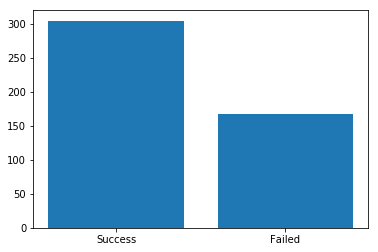

In [1175]:
plt.bar(df['Dependent-Company Status'].unique(), distr)

***
## Preparing data

Now let's select the feature set and prepare our data for classification. 

**Let's print the shape of our dataset before cleaning and hope that we'll not destroy it comletely after cleaning. :D**

In [1176]:
print("Shape before cleaning: ", df.shape)

Shape before cleaning:  (472, 116)


### Choosing the feature set...

Copy the dataset without the company name, as it does not give any information, and let's exclude unnecessary features one by one.

In [1177]:
features = df.drop('Company_Name', 1) 

### Handling NaN values...

Before we rush to drop the rows that have at least one NaN value, let's see again which features have the most NaN values. Maybe the presence of those features is less important compared to the amount of data we'll lose...

What are the most empty columns in our dataset?

In [1178]:
nan_df = pd.DataFrame(df.isna().sum().sort_values(ascending=False))
print(nan_df[nan_df[0] != 0].count())
nan_df[nan_df[0] != 0]

0    18
dtype: int64


,0
Employees count MoM change,205
Gartner hype cycle stage,172
Time to maturity of technology (in years),172
Employee Count,166
Last Funding Amount,160
Short Description of company profile,149
Investors,140
Industry of company,124
Last Funding Date,122
Est. Founding Date,109


In [1179]:
nan_cols = list(nan_df.index)
nan_cols[0:18]

['Employees count MoM change',
 'Gartner hype cycle stage',
 'Time to maturity of technology (in years)',
 'Employee Count',
 'Last Funding Amount',
 'Short Description of company profile',
 'Investors',
 'Industry of company',
 'Last Funding Date',
 'Est. Founding Date',
 'Specialization of highest education',
 'Industry trend in investing',
 'Country of company',
 'Continent of company',
 'Internet Activity Score',
 'Has the team size grown',
 'Age of company in years',
 'Focus functions of company']



- **'Last Funding Amount'** we can assume that the companies that did not get funding have NaN values both here and in *'Last Funding Date'*, so we could maybe replace those NaN values with 0s and drop others. After this we can drop also the *'Last Funding Date'* column.
- **'Investors'** my intuition on this one is that the rows that don't have investors have NaN values, so instead of dropping them, I'm going to substitute those with 'none'.
- **'Industry of company'** same here, if the value is NaN the company belongs to some other industry not listed here. So we can replace NaNs with 'other'.
- **'Focus functions of company'** again, replace with 'none'.

- We will drop the rest of the features as after several trial I discovered that if we don't do that the success/failure ratio suffers so much that training the model is very difficult.

In [1180]:
# Substitute NaNs with 0s as discussed above.
for index, row in features.iterrows():
    amount = row['Last Funding Amount']
    date = row['Last Funding Date']
    
    # Checking if both are NaN
    if amount != amount and date != date:
        features.at[index, 'Last Funding Amount'] = 0 
        
# Sustitute NaNs with empty strings.
features['Investors'] = features['Investors'].fillna('none')
features['Industry of company'] = features['Industry of company'].fillna('other')
features['Focus functions of company'] = features['Focus functions of company'].fillna('none')

# Drop the discussed columns.
features = features.drop(['Employees count MoM change',
                             'Gartner hype cycle stage',
                             'Time to maturity of technology (in years)',
                             'Employee Count',
                             'Short Description of company profile',
                             'Last Funding Date',
                             'Est. Founding Date',
                             'Specialization of highest education',
                             'Industry trend in investing',
                             'Country of company',
                             'Continent of company',
                             'Internet Activity Score',
                             'Has the team size grown',
                             'Age of company in years'], axis=1)

# Drop the rest of the NaN rows, if any, should not be.
features = features.dropna()

# Reset index to avoid further issues.
features = features.reset_index(drop=True)

features.head()

,Dependent-Company Status,year of founding,Industry of company,Focus functions of company,Investors,Last Funding Amount,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Presence of a top angel or venture fund in previous round of investment,Number of of repeat investors,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Years of education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Renowned in professional circle,Experience in selling and building products,Experience in Fortune 100 organizations,Experience in Fortune 500 organizations,Experience in Fortune 1000 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Number of of Research publications,Skills score,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,google page rank of company website,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Disruptiveness of technology,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),"Survival through recession, based on existence of the company through recession times",Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Success,No Info,other,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,450000.0,2,0,1,2,2,15,Yes,4,Nothing,No,Small,No,No,No,No,Service,No,Private,No,Both,Yes,Platform,Global,Linear,Yes,None,No,No,No,No,No,No,No,No,No,Yes,Online,B2C,High,High,Yes,Low,Masters,21,Yes,Yes,Tier_1,500,Medium,0,0,0,None,0,None,0,Low,Low,Yes,No,High,No Info,No,No,Yes,No,No,No,No Info,9626884,No,Yes,No,Low,0,1.5,0.45,No Info,No 

In [1181]:
features.shape

(434, 101)

In [1182]:
features['Dependent-Company Status'].value_counts()

Success    276
Failed     158
Name: Dependent-Company Status, dtype: int64

<BarContainer object of 2 artists>

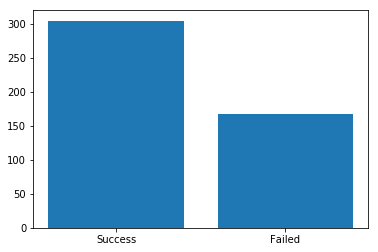

In [1183]:
plt.bar(features['Dependent-Company Status'].unique(), distr)

So far so good!

### Handling not NaN empty values...

Although we removed a bunch of NaN values, there are still some records that in principle are not NaN but have the same effect. As those values can be anything, I am going to manually look into the dataset to detect them. To, nevertheless, ease the job, I'll look into the set of unique values of each column. 

In [1184]:
col_sets = []
for c in features.columns:
    col_sets.append(c)
    col_sets.append(features[c].unique())
    
#col_sets
col_sets[20:26] # Just showing a sample batch.

['Team size Senior leadership',
 array([ 2,  4,  7,  8,  3,  6,  5,  1, 10, 14,  9, 12, 11, 24]),
 'Team size all employees',
 array(['15', '20', '10', '50', '40', '14', '3', '22', '200', '26', '33',
        '5', '6', '110', '132', '8', '12', '13', '30', '4', '57', '23',
        '32', '300', '616', '7', '28', '55', '115', '70', '18', '17',
        '488', 'No Info', '88', '315', '11', '130', '175', '75', '120',
        '100', '80', '51', '322', '46', '105', '42', '290', '60', '25',
        '16', '43', '226', '45', '49', '24', '85', '48', '9', '77', '173',
        '415', '433', '37', '96', '2', '36', '297', '65', '34', '5000',
        '1', '53', '87', '31', '74', '56', '94', '143', '41', '150',
        '1100', '90', '800'], dtype=object),
 'Presence of a top angel or venture fund in previous round of investment',
 array(['Yes', 'No', 'No Info'], dtype=object)]

 **Based on my obervations, here are the NaN value strings:**

- 'No Info' 
<!-- 'Number of Investors in Seed', 'Number of Investors in Angel and or VC', 'Presence of a top angel or venture fund in previous round of investment', 'year of founding', 'Team size all employees', 'Presence of a top angel or venture fund in previous round of investment', 'Subscription based business', 'Local or global player', 'Linear or Non-linear business model', 'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive', 'Number of  of Partners of company', 'Online or offline venture - physical location based business or online venture?', 'Exposure across the globe', 'Renowned in professional circle', 'Breadth of experience across verticals', 'Highest education', 'Years of education', 'Relevance of education to venture', 'Relevance of experience to venture', 'Degree from a Tier 1 or Tier 2 university?', 'Employees per year of company existence', 'Time to 1st investment (in months)', 'Avg time to investment - average across all rounds, measured from previous investment', 'Team Composition score', 'Pricing Strategy', 'Time to market service or product', 'Employee benefits and salary structures', 'Long term relationship with other founders', 'Client Reputation', 'Solutions offered', 'Invested through global incubation competitions?', 'Survival through recession, based on existence of the company through recession times' -->
- '\\\\' 
- 'N'
- 'unknown amount'
 

Let's see what are the losses of cleaning in this case.

In [1185]:
no_info_df = pd.DataFrame(features.apply(lambda x: (x == "No Info") | (x == "\\") 
                        | (x == "N") | (x == "unknown amount"))
                          .sum().sort_values(ascending=False))

no_info_df = no_info_df[no_info_df[0] > 20]
cols = list(no_info_df.index)
no_info_df

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,0
Employee benefits and salary structures,324
Client Reputation,252
google page rank of company website,147
Invested through global incubation competitions?,132
Last round of funding received (in milionUSD),130
Employees per year of company existence,124
Number of of Partners of company,97
Highest education,97
Years of education,97
"Survival through recession, based on existence of the company through recession times",95


- Let's drop all the columns that have more than 20 'empty values'.
- 'Last round of funding received (in milionUSD)' repeats 'Last Funding Amount', so let's loop and synchronize the values and drop the 'Last round of funding received (in milionUSD)'.

In [1186]:
cols

['Employee benefits and salary structures',
 'Client Reputation',
 'google page rank of company website',
 'Invested through global incubation competitions?',
 'Last round of funding received (in milionUSD)',
 'Employees per year of company existence',
 'Number of  of Partners of company',
 'Highest education',
 'Years of education',
 'Survival through recession, based on existence of the company through recession times',
 'Time to 1st investment (in months)',
 'Relevance of education to venture',
 'Avg time to investment - average across all rounds, measured from previous investment',
 'Presence of a top angel or venture fund in previous round of investment',
 'Renowned in professional circle',
 'Long term relationship with other founders',
 'Degree from a Tier 1 or Tier 2 university?',
 'Proprietary or patent position (competitive position)',
 'Relevance of experience to venture',
 'Dificulty of Obtaining Work force',
 'Legal risk and intellectual property',
 'Company awards',
 'Numb

In [1187]:
for index, row in features.iterrows():
    # Last funding
    if row['Last round of funding received (in milionUSD)'].lower() != 'no info':
        try:
            features.at[index, 'Last Funding Amount'] = float(row['Last round of funding received (in milionUSD)']) * 1000000 
        except: 
            pass    

#### Now... WE MURDER!!!!!!

In [1188]:
features = features.drop(['Employee benefits and salary structures',
                             'Client Reputation',
                             'google page rank of company website',
                             'Invested through global incubation competitions?',
                             'Last round of funding received (in milionUSD)',
                             'Employees per year of company existence',
                             'Highest education',
                             'Years of education',
                             'Number of  of Partners of company',
                             'Survival through recession, based on existence of the company through recession times',
                             'Time to 1st investment (in months)',
                             'Relevance of education to venture',
                             'Avg time to investment - average across all rounds, measured from previous investment',
                             'Presence of a top angel or venture fund in previous round of investment',
                             'Renowned in professional circle',
                             'Long term relationship with other founders',
                             'Degree from a Tier 1 or Tier 2 university?',
                             'Relevance of experience to venture',
                             'Dificulty of Obtaining Work force',
                             'Proprietary or patent position (competitive position)',
                             'Company awards',
                             'Legal risk and intellectual property',
                             'Number of  of Research publications',
                             'Exposure across the globe',
                             'Breadth of experience across verticals',
                             'Solutions offered',
                             'Technical proficiencies to analyse and interpret unstructured data',
                             'Top management similarity',
                             'Team Composition score',
                             'Pricing Strategy',
                             'Time to market service or product',
                             'Experience in Fortune 1000 organizations',
                             'Hyper localisation',
                             'Experience in selling and building products',
                             'Disruptiveness of technology',
                             'Controversial history of founder or co founder',
                             'Experience in Fortune 100 organizations',
                             'Experience in Fortune 500 organizations',
                             "Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?",
                             'Number of Direct competitors',
                             'Average Years of experience for founder and co founder',
                             'Skills score',
                             'Number of Recognitions for Founders and Co-founders',
                             'Team size all employees',
                             'Percent_skill_Investment',
                             'Renown score',
                             'Percent_skill_Entrepreneurship',
                             'Percent_skill_Finance',
                             'Percent_skill_Operations',
                             'Percent_skill_Engineering',
                             'Percent_skill_Marketing',
                             'Percent_skill_Leadership',
                             'Percent_skill_Data Science',
                             'Percent_skill_Business Strategy',
                             'Percent_skill_Product Management',
                             'Percent_skill_Sales',
                             'Percent_skill_Domain',
                             'Percent_skill_Law',
                             'Percent_skill_Consulting',
                             'year of founding',
                             'Number of  Sales Support material',
                             'Number of Investors in Angel and or VC',
                             'Number of Investors in Seed',
                             'Number of of repeat investors',
                             'Prescriptive analytics business',
                             'Average size of companies worked for in the past',
                             'Is the company an aggregator/market place? e.g. Bluekai',
                             'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive',
                             'Consulting experience?',
                             'Local or global player'], axis=1)


#### And now we clean...

In [1189]:
# Dropping 'empty value' rows...
for col in features.columns:
    features = features[(features[col] != "No Info") & (features[col] != "\\") 
                        & (features[col] != "N") & (features[col] != "unknown amount")]

# Resetting index for safety...
features = features.reset_index(drop=True)

print(features.shape)
print(features['Dependent-Company Status'].value_counts())

features.head()

(389, 31)
Success    265
Failed     124
Name: Dependent-Company Status, dtype: int64


,Dependent-Company Status,Industry of company,Focus functions of company,Investors,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Worked in top companies,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Linear or Non-linear business model,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Barriers of entry for the competitors
0,Success,other,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,450000.0,1,2,2,No,No,No,No,Service,No,Private,No,Both,Yes,Platform,Linear,No,No,No,No,No,No,No,No,Online,B2C,Yes
1,Success,Market Research|Marketing|Crowdfunding,"Marketing, sales",none,5000000.0,2,0,4,Yes,Yes,Yes,No,Product,No,Public,Yes,Both,No,Platform,Non-Linear,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Online,B2C,Yes
2,Success,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,2350000.0,3,0,7,Yes,No,No,No,Both,Yes,Private,Yes,Both,Yes,cloud,Non-Linear,No,No,No,Yes,No,Yes,No,No,Online,B2B,Yes
3,Success,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,10250000.0,2,0,4,No,Yes,Yes,No,Product,Yes,Public,Yes,Structured,Yes,Platform,Non-Linear,Yes,No,No,No,No,No,No,No,Online,B2C,Yes
4,Success,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,5500000.0,1,1,8,No,No,No,No,Product,Yes,Public,Yes,Both,No,Platform,Non-Linear,No,No,No,No,No,Yes,No,No,Online,B2B,Yes


<BarContainer object of 2 artists>

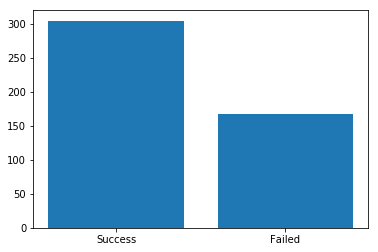

In [1190]:
plt.bar(features['Dependent-Company Status'].unique(), distr)

Seems like we managed to keep the ratio roughly as it was originally. 

### Handling list values...

Let's now convert the following values into lists of strings and store the count. 

 - *'Industry of company'*
 - *'Investors'*
 - *'Focus functions of company'*
 
Let's keep the industry count in a separate column, as we are going to need the original feature very soon.

In [1191]:
features['Industry of company'] = features['Industry of company'].apply(lambda x: x.lower().strip().split('|'))
features['Number of Industries of company'] = features['Industry of company'].apply(lambda x: len(x) - 1 if 'other' in x else len(x))
features['Investors'] = features['Investors'].apply(lambda x: len(x.split('|')) - 1 if 'none' in x else len(x.split('|')))

def process_str(x) :
    str_list = re.split(',|&|\n|\|', x.lower())
    str_list = list(map(str.strip, str_list))
    return str_list

features['Focus functions of company'] = features['Focus functions of company'].apply(lambda x: len(process_str(x)) - 1 if 'none' in x else len(process_str(x)))

features.head()

,Dependent-Company Status,Industry of company,Focus functions of company,Investors,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Worked in top companies,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Linear or Non-linear business model,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Barriers of entry for the competitors,Number of Industries of company
0,Success,[other],1,7,450000.0,1,2,2,No,No,No,No,Service,No,Private,No,Both,Yes,Platform,Linear,No,No,No,No,No,No,No,No,Online,B2C,Yes,0
1,Success,"[market research, marketing, crowdfunding]",2,0,5000000.0,2,0,4,Yes,Yes,Yes,No,Product,No,Public,Yes,Both,No,Platform,Non-Linear,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Online,B2C,Yes,3
2,Success,"[analytics, cloud computing, software developm...",1,28,2350000.0,3,0,7,Yes,No,No,No,Both,Yes,Private,Yes,Both,Yes,cloud,Non-Linear,No,No,No,Yes,No,Yes,No,No,Online,B2B,Yes,3
3,Success,"[mobile, analytics]",2,9,10250000.0,2,0,4,No,Yes,Yes,No,Product,Yes,Public,Yes,Structured,Yes,Platform,Non-Linear,Yes,No,No,No,No,No,No,No,Online,B2C,Yes,2
4,Success,"[analytics, marketing, enterprise software]",2,14,5500000.0,1,1,8,No,No,No,No,Product,Yes,Public,Yes,Both,No,Platform,Non-Linear,No,No,No,No,No,Yes,No,No,Online,B2B,Yes,3


Except the industry count, I am going to also keep track of each industry. For that, let's convert the lists into binary features. 

In [1192]:
# For every row in the dataframe, iterate through the list of industries 
# and place a 1 into the corresponding column.
industries = []
for index, row in features.iterrows():
    for industry in row['Industry of company']:
        industries.append(industry)
        new_name = 'Industry of company' + ' ' + industry
        features.at[index, new_name] = 1

# Keeping only the unique industries.
industries = list(set(industries))   

# Filling in the NaN values with 0 to show that a company doesn't belong to that column's industry.
features = features.fillna(0)
features = features.drop('Industry of company', 1)
features.head()

,Dependent-Company Status,Focus functions of company,Investors,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Worked in top companies,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Linear or Non-linear business model,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Barriers of entry for the competitors,Number of Industries of company,Industry of company other,Industry of company market research,Industry of company marketing,Industry of company crowdfunding,Industry of company analytics,Industry of company cloud computing,Industry of company software development,Industry of company mobile,Industry of company enterprise software,Industry of company food & beverages,Industry of company hospitality,Industry of company network / hosting / infrastructure,Industry of company healthcare,Industry of company pharmaceuticals,Industry of company media,Industry of company finance,Industry of company music,Industry of company e-commerce,Industry of company gaming,Industry of company advertising,Industry of company retail,Industry of company email,Industry of company security,Industry of company human resources (hr),Industry of company career / job search,Industry of company publishing,Industry of company education,Industry of company entertainment,Industry of company transportation,Industry of company social networking,Industry of company real estate,Industry of company search,Industry of company insurance,Industry of company cleantech,Industry of company energy,Industry of company space travel,Industry of company deals,Industry of company telecommunications,Industry of company classifieds,Industry of company travel,Industry of company government
0,Success,1,7,450000.0,1,2,2,No,No,No,No,Service,No,Private,No,Both,Yes,Platform,Linear,No,No,No,No,No,No,No,No,Online,B2C,Yes,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Success,2,0,5000000.0,2,0,4,Yes,Yes,Yes,No,Product,No,Public,Yes,Both,No,Platform,Non-Linear,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Online,B2C,Yes,3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Success,1,28,2350000.0,3,0,7,Yes,No,No,No,Both,Yes,Private,Yes,Both,Yes,cloud,Non-Linear,No,No,No,Yes,No,Yes,No,No,Online,B2B,Yes,3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Success,2,9,10250000.0,2,0,4,No,Yes,Yes,No,Product,Yes,Public,Yes,Structured,Yes,Platform,Non-Linear,Yes,No,No,No,No,No,No,No,Online,B2C,Yes,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Success,2,14,5500000.0,1,1,8,No,No,No,No,Product,Yes,Public,Yes,Both,No,Platform,Non-Linear,No,No,No,No,No,Yes,No,No,Online,B2B,Yes,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Encoding categorical variables...

Now let's process the rest of the features.

First, let's encode the statuses.

In [1193]:
statuses = features['Dependent-Company Status']
statuses.unique()

array(['Success', 'Failed'], dtype=object)

Let's make sure, the success/failure distribution is fair. 

In [1194]:
statuses.replace(to_replace=['Success', 'Failed'], value=[1,0], inplace=True)
statuses.head()

0    1
1    1
2    1
3    1
4    1
Name: Dependent-Company Status, dtype: int64

And let's drop the column from features list.

In [1195]:
features = features.drop('Dependent-Company Status', 1)

Let's consider answers having less than 25 unique values as categorical in our feature list.

In [1196]:
cat_columns = []
cat_vals = []
for col in features.columns:
    if col != 'Industry of company' and len(features[col].unique()) < 25:
        if isinstance(features[col][0], str):
            col_set = sorted(features[col].apply(lambda x: x.lower()).unique())
        else:
            col_set = sorted(features[col].unique())
        if not((len(col_set) == 2) and (col_set[0] == 0) and (col_set[1] == 1)):
            cat_columns.append(col)
            cat_vals.append(col_set)

categoricals = pd.DataFrame()
categoricals['Feature'] = cat_columns
categoricals['Categories'] = cat_vals

categoricals

,Feature,Categories
0,Focus functions of company,"[0, 1, 2, 3, 4, 5]"
1,Investors,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,Number of Co-founders,"[0, 1, 2, 3, 4, 5, 6, 7]"
3,Number of of advisors,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]"
4,Team size Senior leadership,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 24]"
5,Worked in top companies,"[no, yes]"
6,Have been part of startups in the past?,"[no, yes]"
7,Have been part of successful startups in the p...,"[no, yes]"
8,Was he or she partner in Big 5 consulting?,"[no, yes]"
9,Product or service company?,"[both, product, service]"


Great! Now we have the features that should be encoded as binary variables, like we did in case of idustries. We have to make sure that every column has the original feature name attached to the answer so that noting gets overwritten (e.g. *'both'*, *'none'*). 

In [1197]:
for index, row in features.iterrows():
    for feature in categoricals.Feature:
        if isinstance(row[feature], str):
            new_feature_name = feature + " " + str(row[feature].lower().strip())
        else:
            new_feature_name = feature + " " + str(row[feature])
        features.at[index, new_feature_name] = 1
        
features = features.fillna(0)

features.head()

,Focus functions of company,Investors,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Worked in top companies,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Linear or Non-linear business model,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Barriers of entry for the competitors,Number of Industries of company,Industry of company other,Industry of company market research,Industry of company marketing,Industry of company crowdfunding,Industry of company analytics,Industry of company cloud computing,Industry of company software development,Industry of company mobile,Industry of company enterprise software,Industry of company food & beverages,Industry of company hospitality,Industry of company network / hosting / infrastructure,Industry of company healthcare,Industry of company pharmaceuticals,Industry of company media,Industry of company finance,Industry of company music,Industry of company e-commerce,Industry of company gaming,Industry of company advertising,Industry of company retail,Industry of company email,Industry of company security,Industry of company human resources (hr),Industry of company career / job search,Industry of company publishing,Industry of company education,Industry of company entertainment,Industry of company transportation,Industry of company social networking,Industry of company real estate,Industry of company search,Industry of company insurance,Industry of company cleantech,Industry of company energy,Industry of company space travel,Industry of company deals,Industry of company telecommunications,Industry of company classifieds,Industry of company travel,Industry of company government,Focus functions of company 1,Investors 7,Number of Co-founders 1,Number of of advisors 2,Team size Senior leadership 2,Worked in top companies no,Have been part of startups in the past? no,Have been part of successful startups in the past? no,Was he or she partner in Big 5 consulting? no,Product or service company? service,Catering to product/service across verticals no,Focus on private or public data? private,Focus on consumer data? no,Focus on structured or unstructured data both,Subscription based business yes,Cloud or platform based serive/product? platform,Linear or Non-linear business model linear,Crowdsourcing based business no,Crowdfunding based business no,Machine Learning based business no,Predictive Analytics business no,Speech analytics business no,Big Data Business no,Cross-Channel Analytics/ marketing channels no,Owns data or not? (monetization of data) e.g. Factual no,Online or offline venture - physical location based business or online venture? online,B2C or B2B venture? b2c,Barriers of entry for the competitors yes,Number of Industries of company 0,Focus functions of company 2,Investors 0,Number of Co-founders 2,Number of of advisors 0,Team size Senior leadership 4,Worked in top companies yes,Have been part of startups in the past? yes,Have been part of successful startups in the past? yes,Product or service company? product,Focus on private or public data? public,Focus on consumer data? yes,Subscription based business no,Linear or Non-linear business model non-linear,Crowdsourcing based business yes,Machine Learning based business yes,Predictive Analytics business yes,Big Data Business yes,Cross-Channel Analytics/ marketing channels y

Let's drop the original columns.

In [1198]:
features = features.reset_index(drop=True)

for feature in categoricals['Feature']:
    features = features.drop(feature, 1)
    
features.head()

,Last Funding Amount,Industry of company other,Industry of company market research,Industry of company marketing,Industry of company crowdfunding,Industry of company analytics,Industry of company cloud computing,Industry of company software development,Industry of company mobile,Industry of company enterprise software,Industry of company food & beverages,Industry of company hospitality,Industry of company network / hosting / infrastructure,Industry of company healthcare,Industry of company pharmaceuticals,Industry of company media,Industry of company finance,Industry of company music,Industry of company e-commerce,Industry of company gaming,Industry of company advertising,Industry of company retail,Industry of company email,Industry of company security,Industry of company human resources (hr),Industry of company career / job search,Industry of company publishing,Industry of company education,Industry of company entertainment,Industry of company transportation,Industry of company social networking,Industry of company real estate,Industry of company search,Industry of company insurance,Industry of company cleantech,Industry of company energy,Industry of company space travel,Industry of company deals,Industry of company telecommunications,Industry of company classifieds,Industry of company travel,Industry of company government,Focus functions of company 1,Investors 7,Number of Co-founders 1,Number of of advisors 2,Team size Senior leadership 2,Worked in top companies no,Have been part of startups in the past? no,Have been part of successful startups in the past? no,Was he or she partner in Big 5 consulting? no,Product or service company? service,Catering to product/service across verticals no,Focus on private or public data? private,Focus on consumer data? no,Focus on structured or unstructured data both,Subscription based business yes,Cloud or platform based serive/product? platform,Linear or Non-linear business model linear,Crowdsourcing based business no,Crowdfunding based business no,Machine Learning based business no,Predictive Analytics business no,Speech analytics business no,Big Data Business no,Cross-Channel Analytics/ marketing channels no,Owns data or not? (monetization of data) e.g. Factual no,Online or offline venture - physical location based business or online venture? online,B2C or B2B venture? b2c,Barriers of entry for the competitors yes,Number of Industries of company 0,Focus functions of company 2,Investors 0,Number of Co-founders 2,Number of of advisors 0,Team size Senior leadership 4,Worked in top companies yes,Have been part of startups in the past? yes,Have been part of successful startups in the past? yes,Product or service company? product,Focus on private or public data? public,Focus on consumer data? yes,Subscription based business no,Linear or Non-linear business model non-linear,Crowdsourcing based business yes,Machine Learning based business yes,Predictive Analytics business yes,Big Data Business yes,Cross-Channel Analytics/ marketing channels yes,Owns data or not? (monetization of data) e.g. Factual yes,Number of Industries of company 3,Investors 28,Number of Co-founders 3,Team size Senior leadership 7,Product or service company? both,Catering to product/service across verticals yes,Cloud or platform based serive/product? cloud,B2C or B2B venture? b2b,Investors 9,Focus on structured or unstructured data structured,Number of Industries of company 2,Investors 14,Number of of advisors 1,Team size Senior leadership 8,Investors 8,Number of Co-founders 4,Barriers of entry for the competitors no,Number of of advisors 9,Focus on structured or unstructured data unstructured,Number of Industries of company 1,Investors 3,Number of of advisors 4,Investors 10,Investors 1,Team size Senior leadership 3,Number of Co-founders 0,Investors 5,Team size Senior leadership 6,Was he or she partner in Big 5 consulting? yes,Investors 2,Team size Senior leadership 5,Investors 4,Focus on private or public data? both,Online or

Beautiful...

Now let's make sure everything is a float type in our dataset.

In [1199]:
for col in features.columns:
    features[col] = features[col].apply(lambda x: float(x))

To be even surer, lets print the data types:

In [1200]:
features.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'),

#### FABULOUS! 

### Normalizing the data...

Let's now normalize the data, so that our analysis is accurate.

In [1201]:
X = preprocessing.StandardScaler().fit(features).transform(features)
X[0:7]

array([[-0.5 ,  1.66, -0.11, ..., -0.17, -0.05, -0.05],
       [ 0.02, -0.6 ,  8.76, ..., -0.17, -0.05, -0.05],
       [-0.28, -0.6 , -0.11, ..., -0.17, -0.05, -0.05],
       ...,
       [ 0.08, -0.6 , -0.11, ..., -0.17, -0.05, -0.05],
       [-0.44, -0.6 , -0.11, ..., -0.17, -0.05, -0.05],
       [-0.32, -0.6 , -0.11, ..., -0.17, -0.05, -0.05]])

In [1202]:
y = statuses.values
y[0:7]

array([1, 1, 1, 1, 1, 1, 1])

***
## Classification

We are now ready for classification.

### Train-test split

In [1203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set shape: ', X_train.shape, y_train.shape)
print('Test set shapes: ', X_test.shape, y_test.shape)

Train set shape:  (311, 166) (311,)
Test set shapes:  (78, 166) (78,)


Let's make sure the success/failure distribution is fair.

In [1204]:
print('Train set status distribution: S', y_train.sum(), ', F ', len(y_train) - y_train.sum())
print('Train set status distribution: S', y_test.sum(), ', F ', len(y_test) - y_test.sum())

Train set status distribution: S 208 , F  103
Train set status distribution: S 57 , F  21


### Building the model

To build the model in the most efficient way, I am going to test two different solvers - 'liblinear' and 'sag', with several regularization values ranging from 0.001 to 0.1. I am going to calculate the log loss for each of them and take the records that give the most efficient model.

Min log loss for liblinear:  0.40872492917662273 reg value =  0.044000000000000004
Min log loss for sag:  0.3675623602741586 reg value =  0.025
Time: 5.49 seconds


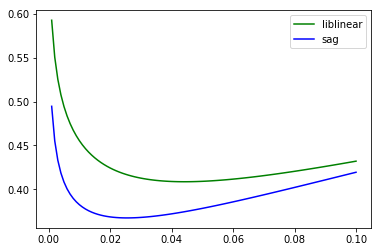

In [1205]:
solvers = ['liblinear', 'sag']
reg_vals = np.linspace(0.001, 0.1, 100) # regularization values
losses = np.zeros(shape=(len(solvers), len(reg_vals)))

start = timeit.default_timer() # Start the timer.

for s, col in zip(solvers, ['g', 'b']):
    i = solvers.index(s)
    for c in reg_vals:
        LR = LogisticRegression(C=c , solver=s, max_iter=3000).fit(X_train, y_train)
        yhat = LR.predict_proba(X_test)
        losses[i, np.where(reg_vals == c)] = metrics.log_loss(y_test, yhat)
    plt.plot(reg_vals, losses[i, :], c=col)

stop = timeit.default_timer() # Stop the timer.

plt.legend(solvers)

print('Min log loss for liblinear: ', losses[0].min(), 'reg value = ', reg_vals[losses[0].argmin()])
print('Min log loss for sag: ', losses[1].min(), 'reg value = ', reg_vals[losses[1].argmin()])
#print('Min log loss for newton-cg: ', losses[2].min(), 'reg value = ', reg_vals[losses[2].argmin()])

print('Time: %.2f seconds' % (stop - start)) 

if losses[0].min() < losses[1].min():
    c = reg_vals[losses[0].argmin()]
    s = solvers[0]
else: 
    c = reg_vals[losses[1].argmin()]
    s = solvers[1]

### Training the model

In [1206]:
#c = 0.07300000000000001
#s = 'sag'
print(c, s)
LR = LogisticRegression(C=c, solver=s, max_iter=3000).fit(X_train, y_train) 
yhat = LR.predict(X_test)
yhat_proba = LR.predict_proba(X_test)

0.025 sag


***
## Testing accuracy

In [1207]:
print('Log loss: ', metrics.log_loss(y_test, yhat_proba))
print('F1 score: ', metrics.f1_score(y_test, yhat))
print('Jaccard index: ', metrics.jaccard_similarity_score(y_test, yhat))

Log loss:  0.3675627292495043
F1 score:  0.8965517241379309
Jaccard index:  0.8461538461538461


Let's see the confusion matrix.

In [1208]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print('Precision: ', cm[0][0]/cm[0].sum())
    print('Recall: ', cm[0][0]/cm[:][0].sum())
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[52  5]
 [ 7 14]]


Confusion matrix, without normalization
Precision:  0.9122807017543859
Recall:  0.9122807017543859
[[52  5]
 [ 7 14]]


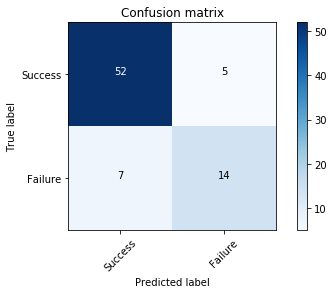

In [1209]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Success','Failure'], normalize=False, title='Confusion matrix')

Not so bad!

***
## Analyzing results

Let's now analyze the results we got. 

First, get the calculated weights of the features.

In [1210]:
weights = LR.coef_
weights

array([[ 7.31e-02, -9.81e-02,  6.04e-02,  1.29e-01, -9.75e-05,  2.79e-01,
         1.37e-01, -1.14e-01,  1.41e-02,  8.67e-02, -9.21e-02,  6.20e-02,
        -5.35e-02, -3.48e-02,  2.72e-02, -2.11e-02, -7.13e-02, -1.07e-01,
        -4.45e-02, -2.51e-02, -2.76e-02,  5.83e-02, -2.75e-02,  8.56e-02,
         7.25e-03,  7.25e-03,  8.46e-02, -9.63e-02,  6.10e-03, -9.75e-05,
        -4.16e-02,  1.02e-01, -7.11e-02,  1.22e-02,  6.54e-02, -8.24e-02,
        -7.68e-02,  1.71e-02,  8.76e-03, -3.95e-02,  1.87e-02,  1.23e-02,
        -1.17e-02,  8.84e-03, -6.47e-02, -9.13e-02, -1.45e-01,  2.15e-02,
         2.34e-02,  8.83e-02, -7.61e-02, -5.30e-03, -1.19e-01, -4.15e-02,
        -1.39e-02,  2.51e-02, -1.35e-02, -1.07e-01, -4.21e-02,  5.59e-02,
        -2.93e-02, -2.48e-02, -8.24e-02,  3.94e-02, -1.97e-01, -7.77e-02,
        -5.57e-02, -1.39e-02, -6.82e-02, -1.72e-01, -9.81e-02,  9.14e-02,
        -5.27e-02,  4.68e-02,  8.86e-03,  8.94e-02, -2.15e-02, -2.34e-02,
        -8.83e-02, -1.10e-02,  9.22e-0

How does the overall picture look like?

<BarContainer object of 166 artists>

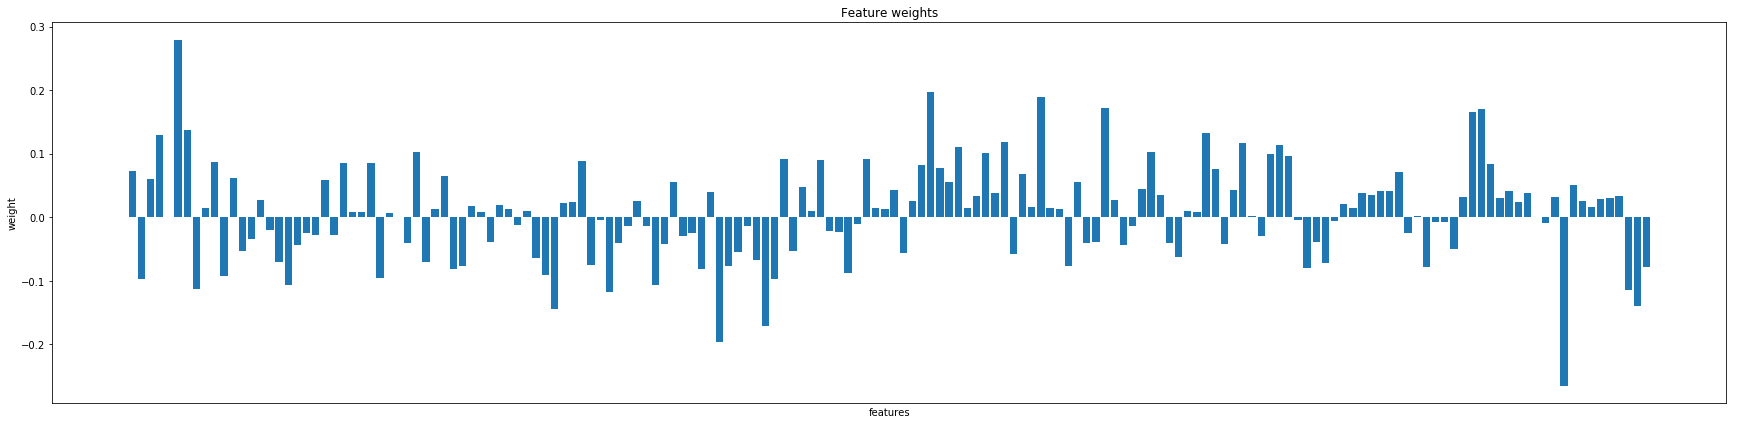

In [1211]:
plt.figure(figsize=(30, 7))
plt.xticks([], [])
plt.title('Feature weights')
plt.ylabel('weight')
plt.xlabel('features')
plt.bar(features.reset_index(drop=True).columns, weights[0])

Let's find out which features affect most to the success rate either negatively or positively.

In [1212]:
# Combining the features with their weights.
feature_dict = dict(zip(features.columns, weights[0]))

In [1213]:
# Sorting the features by their weights.
sorted_dict = sorted(feature_dict, key=feature_dict.get)

majors = pd.DataFrame() # Features that have major effect.
for f in sorted_dict:
    if abs(feature_dict[f]) > 0.15:
        majors = majors.append([[f, feature_dict[f]]])
        
majors.columns = ['Feature', 'Weight']
majors.reset_index(drop=True)

,Feature,Weight
0,Focus on structured or unstructured data no,-0.265175
1,Big Data Business no,-0.196821
2,Barriers of entry for the competitors yes,-0.172129
3,Cloud or platform based serive/product? none,0.164657
4,Focus on structured or unstructured data not a...,0.170766
5,Barriers of entry for the competitors no,0.172129
6,Focus on structured or unstructured data struc...,0.189225
7,Big Data Business yes,0.196821
8,Industry of company analytics,0.279450


Here are the results on a barplot. (Adding some color)

<BarContainer object of 9 artists>

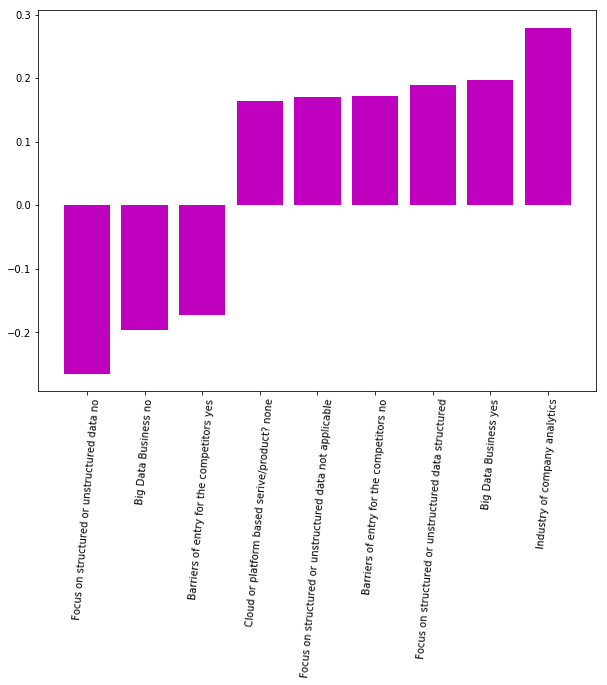

In [1214]:
plt.figure(figsize=(10, 7))
plt.xticks(rotation=85)
plt.bar(majors['Feature'], majors['Weight'], color='m')

Let's compare the weights of the categorical variables that we encoded and present those visually.

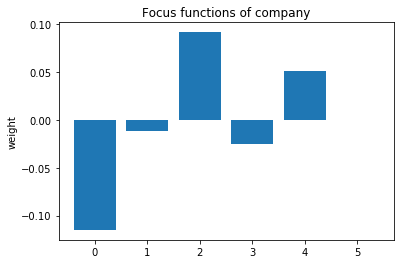

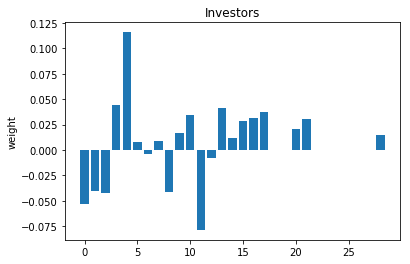

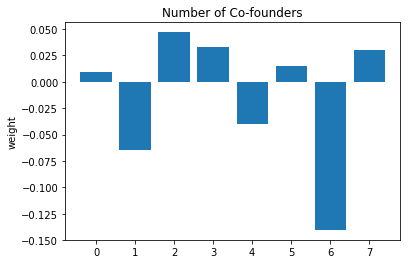

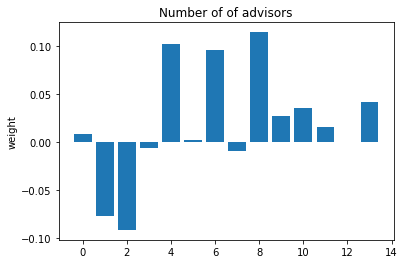

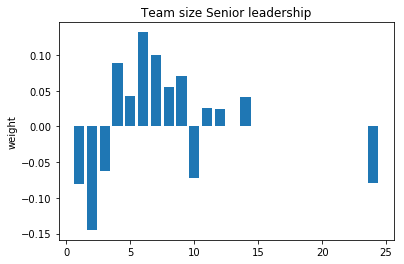

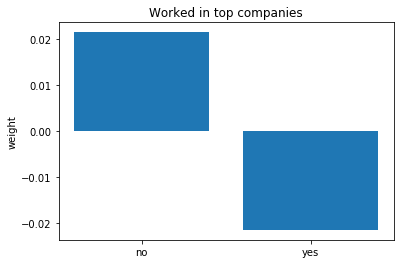

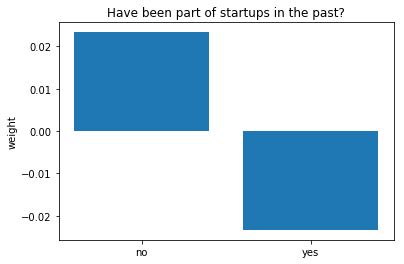

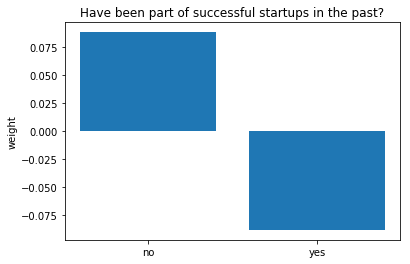

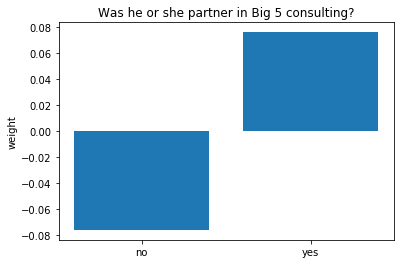

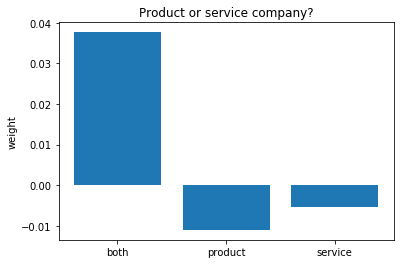

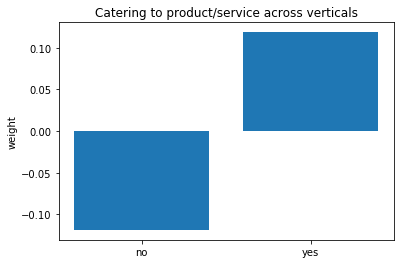

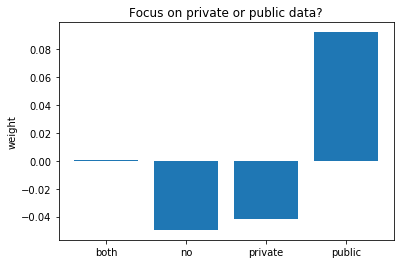

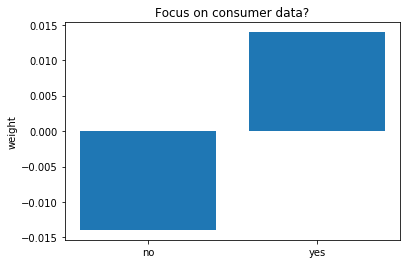

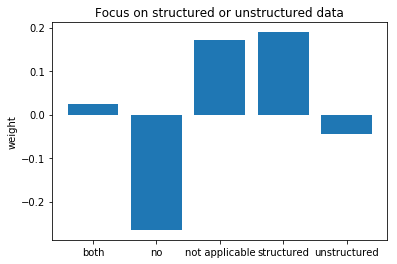

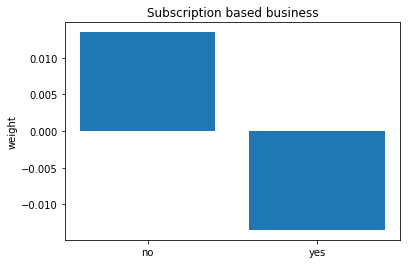

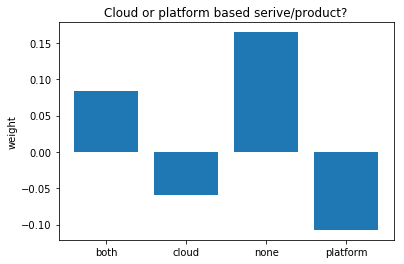

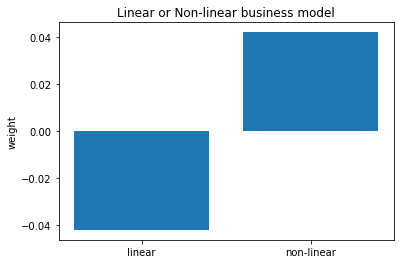

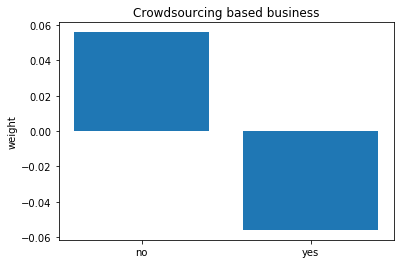

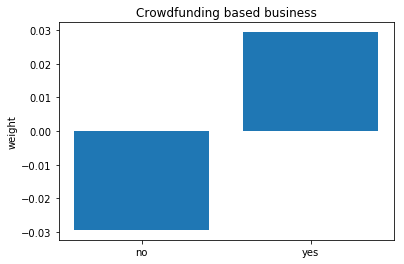

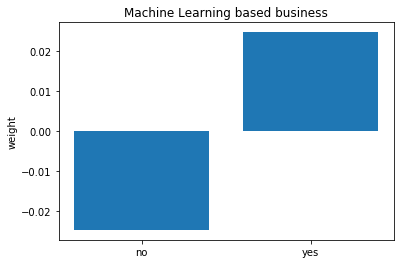

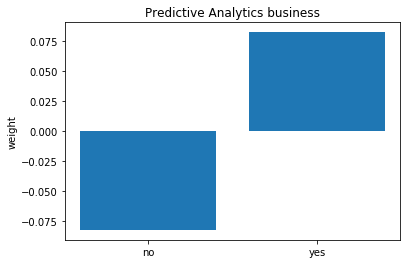

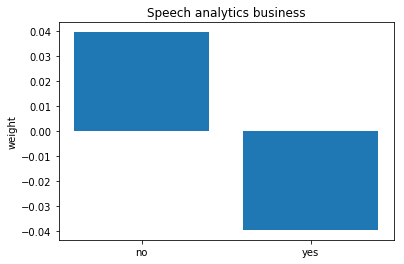

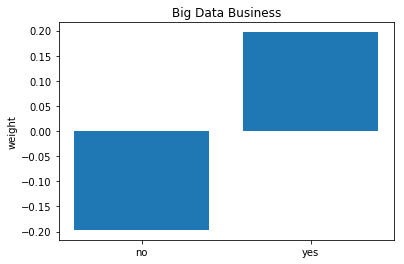

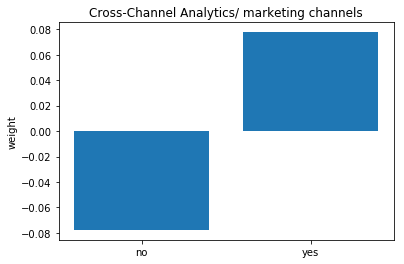

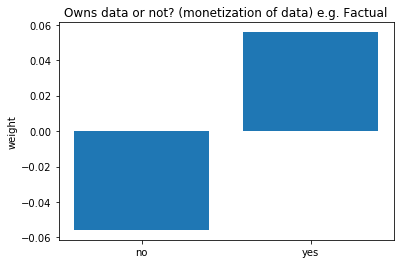

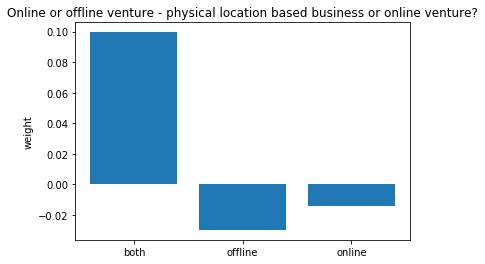

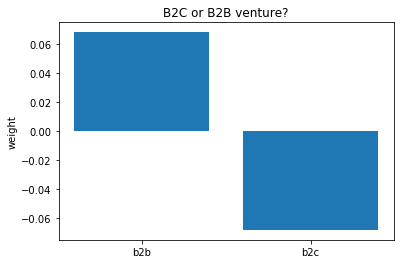

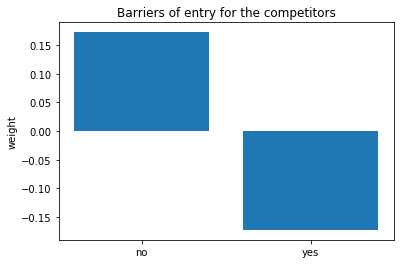

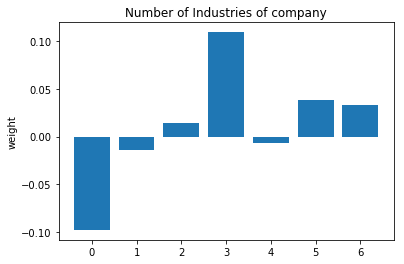

In [1215]:
for index, row in categoricals.iterrows():
    f = row['Feature']
    w = []
    categories = row['Categories']
    for c in categories:
        w.append(feature_dict[f + " " + str(c)])
    
    plt.bar(categories, w)
    plt.title(f)
    plt.ylabel('weight')
    plt.show()


Let's now see if industries play a role. (And add some real color!)

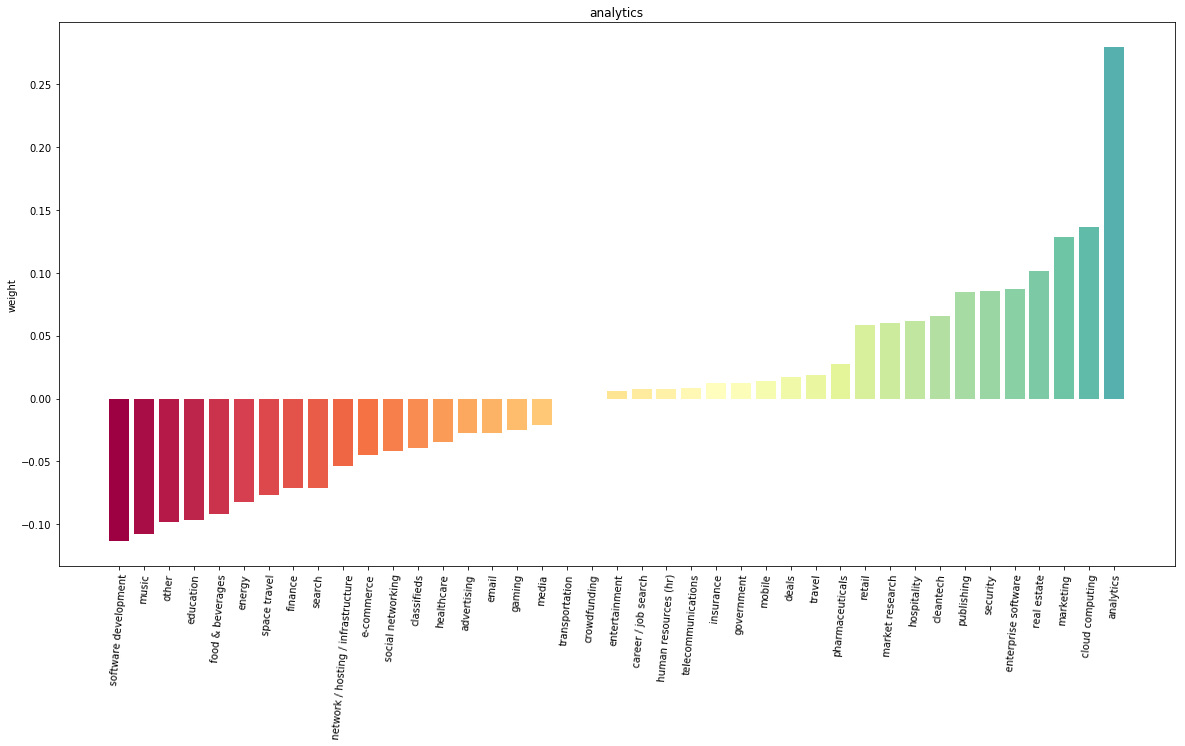

In [1216]:
f = 'Industry of company'
w = []
for c in industries:
    w.append(feature_dict[f + " " + str(c)])

# Creating a dictionary if industry-weights.
industry_dict = dict(zip(industries, w))

# Sorting the industries by their weights.
sorted_dict = sorted(industry_dict, key=industry_dict.get)

indust = []
w = []
for f in sorted_dict:
    indust.append(f)
    w.append(industry_dict[f])

colors = plt.cm.Spectral(np.linspace(0, 0.83, len(indust)))
plt.figure(figsize=(20, 10))
plt.bar(indust, w, color=colors)
# plt[:].set_color(plt.get_cmap('RdYlGn'))
plt.title(f)
plt.xticks(rotation=85)
plt.ylabel('weight')
plt.show()


***
## Report

***
**DISCLAIMER:** This project was done in 3-4 days, thus, you are not recommended to apply the data below on your or someone else's startup. Any damage in result of application of this info will not be reimbursed by the author or be eligible to be held against her in any way.
***

 ### So what does our model tell us?
 I will summerize the most vivid results. More details can be found in the graph above.
 
#### "Good features"
 - Having **sales**, **strategy**, **social media**, **technology**, and **service** as main focus. (These results are from a similar analysis with *'focus of the function'* encoded as binary features.) 
 - Being focused in **three main industries**. 
 - Having both **online and offline venture**.
 - **Not cloud or platform based** product or service.
 - Being focused on **public data**.
 - Providing both **product and service**.
 - Dealing with **Big Data** and/or performing **Predictive Analytics**.
 
 
#### "Bad features"
 - **Not** having focus on **structured or unstructured data**. 
 - **Not** dealing with **Big Data** and/or performing **Predictive Analytics**.
 - Creating **barriers of entry** for the competitors *(I guess)*.
 
#### Senior leadership team size
- Best works with 6 people.
- Works badly with less than 4 or more than 20.

#### Number of advisors
- Best works with 4, 6 or 8 advisors.
- The success rate does NOT grow with the number of advisors. 
- The success rate is especially low with less than 4 advisors, in this case, it's better off without any advisors. 

#### Number of co-founders
- Does NOT work with 6 people. 
- Works best with 2.

#### Number of investors
- As opposed to our intuition, the success rate does NOT grow with the number of investors, nor it does with investment amounts. 
- The best results have been recorded with only 4 investors and the worst with 11. 

#### Number of focus functions
- Having 2 main focus functions for the startup company has proved to increase the success rate. 
- Not having a focus function at all decreases the probability of success drastically.
 
#### Industries
- Startups that record success are usually in the industries: analytics, cloud computing, and marketing
- More startups fail in the industries: software development, music, and education.


***
## Thank you!

**Author:** [Aneta Baloyan](https://www.linkedin.com/in/aneta-baloyan/)

Email: *aneta.baloyan@gmail.com*

***

May 20, 2020

